### Imports and Definitions

In [1]:
from glob import glob
from matplotlib import rcParams
from os import makedirs
from seaborn import pointplot, set_context, set_style, violinplot
import matplotlib.pyplot as plt
DATADIR = '../data'
FIGDIR = '../figs'; makedirs(FIGDIR, exist_ok=True)
RC = {"font.size":12,"axes.titlesize":16,"axes.labelsize":14,"legend.fontsize":10,"xtick.labelsize":10,"ytick.labelsize":10}
set_context("paper", rc=RC); set_style("ticks"); rcParams['font.family'] = 'serif'
rcParams['patch.edgecolor'] = '4C4C4C' # set boxenplot outlines same as violinplot

### Helper: Get Walltime from GNU `time` Output

In [2]:
def walltime_from_time(path):
    tl = [l.strip().split()[-1].strip() for l in open(path) if l.startswith('real')]
    assert len(tl) == 1, "Multiple lines starting with 'real' in: %s" % path
    m = int(tl[0].split('m')[0])
    s = float(tl[0].split('m')[1].rstrip('s'))
    return 60*m + s

### Plot Runtime vs. *n*

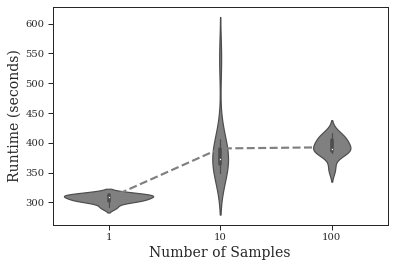

In [3]:
time_vs_n_data = {'n':list(), 'time':list()}
for ndir in glob('%s/sarscov2/n*' % DATADIR):
    n = int(ndir.split('/')[-1].lstrip('n'))
    for rdir in glob('%s/r*' % ndir):
        if rdir.endswith('.zip'):
            continue
        time_vs_n_data['n'].append(n)
        time_vs_n_data['time'].append(walltime_from_time('%s/time.txt' % rdir))
fig = plt.figure()
pointplot(x=time_vs_n_data['n'], y=time_vs_n_data['time'], linestyles='--', color='grey')
violinplot(x=time_vs_n_data['n'], y=time_vs_n_data['time'], color='grey')
plt.xlabel('Number of Samples')
plt.ylabel('Runtime (seconds)')
fig.savefig('%s/runtime.pdf' % FIGDIR, format='pdf', bbox_inches='tight')